In [1]:
import torch
import torch.nn as nn
import torchvision as tv
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [2]:
transforms = tv.transforms.Compose([
    tv.transforms.ToTensor(),
])
dataset = tv.datasets.MNIST('./', transform=transforms, download=True)

torch.Size([1, 28, 28])

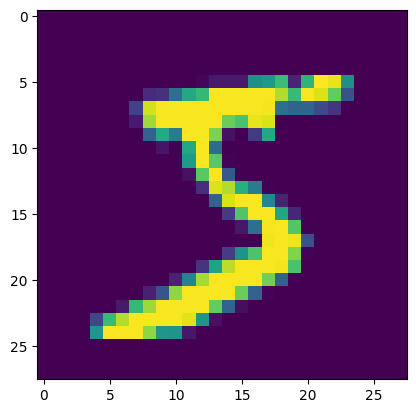

In [3]:
plt.imshow(dataset[0][0].numpy()[0])
dataset[0][0].shape

In [4]:
import torch.utils.data

BATCH_SIZE = 16
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=1, drop_last=True)

In [6]:
class NeuroModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28*28, 128)
        self.linear2 = nn.Linear(128, 32)
        self.linear3 = nn.Linear(32, 10)
        
        self.act = nn.Tanh()
    
    def forward(self, x: torch.Tensor):
        out = self.flat(x)
        out = self.linear1(out)
        out = self.act(out)
        out = self.linear2(out)
        out = self.act(out)
        out = self.linear3(out)
        
        return out

In [7]:
device = 'cuda'

model = NeuroModel().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

def accurancy_fn(pred, label):
    return (pred.argmax(dim=1) == label.argmax(dim=1)).sum().item() / BATCH_SIZE

In [8]:
EPOCHS = 5

for epoch in range(EPOCHS):
    loss_val = 0
    accurancy = 0

    for img, label in (pbar := tqdm.tqdm(dataloader)):
        img = img.to(device)
        optimizer.zero_grad()
        
        label = nn.functional.one_hot(label, 10).float().to(device)
        pred = model(img)
        loss = loss_fn(pred, label)
        
        loss_item = loss.item()
        loss_val += loss_item
        acc_val = accurancy_fn(pred.cuda(), label.cuda())
        accurancy += acc_val
        
        loss.backward()
        optimizer.step()
        
        pbar.set_description(f'loss {loss_item:.3f}\taccurancy {acc_val:.3f}')

    print(loss_item/len(dataloader))
    print(accurancy/len(dataloader))


loss 2.216	accurancy 0.375: 100%|██████████| 3750/3750 [00:24<00:00, 152.31it/s]


0.0005910086313883463
0.18615


loss 2.181	accurancy 0.500: 100%|██████████| 3750/3750 [00:24<00:00, 150.48it/s]


0.0005815808614095052
0.42641666666666667


loss 2.174	accurancy 0.625:  40%|████      | 1507/3750 [00:12<00:18, 118.92it/s]


KeyboardInterrupt: 

: 

In [99]:
img = tv.io.read_image('../1.png', mode=tv.io.ImageReadMode.GRAY)
img = img.type(torch.float32) / 255
img.shape

torch.Size([1, 28, 28])

In [101]:
pred = model(img)
pred.argmax()

tensor(1)